In [1]:
import sys; sys.path.append('..')

In [2]:
from IPython.display import Image
from os import path

In [3]:
from collections import deque

In [4]:
from graph import Graph
from graph.util import is_steiner_tree, has_cycle, how_many_components

In [5]:
def compose(red : Graph, blue : Graph):
    '''
    Parameters:
    ----------
        red, blue : Graph

    Return:
    -------
        g_union, g_common, g_star : Graph
    '''

    g_union  = Graph()
    g_common = Graph()
    g_star   = Graph()

    for v, u in red.gen_undirect_edges():
        g_union.add_edge(v,u)

        if not blue.has_edge(v,u):
            g_star.add_edge(v,u)

    for v, u in blue.gen_undirect_edges():
        g_union.add_edge(v,u)

        if red.has_edge(v,u):
            g_common.add_edge(v,u)
        else:
            g_star.add_edge(v,u)


    return g_union, g_common, g_star

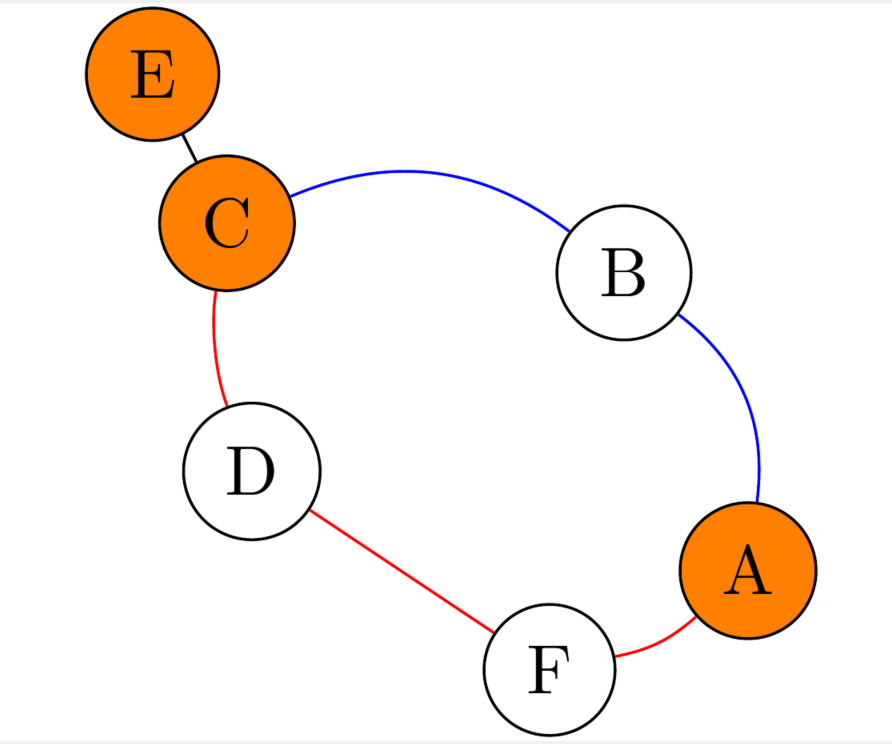

In [6]:
size = 200
Image(filename=path.join('img', 'grafo_1.png'), height=size, width=size)

In [7]:
aa = Graph(edges={
    'E' : {'C' : 5},
    'C' : {'E' : 5 , 'D' : 4},
    'D' : {'C' : 4 , 'F' : 9},
    'F' : {'D' : 9 , 'A' : 3},
    'A' : {'F' : 3}
})

bb = Graph(edges={
    'E' : {'C' : 4},
    'C' : {'E' : 4,  'B' : 10},
    'B' : {'C' : 10, 'A' : 11},
    'A' : {'B' : 11},
})

g_union, g_common, g_star = compose(aa, bb)

In [8]:
class Component:

    def __init__(self):
        self.who = 'default'
        self.portal = set()
        self.edges = set()

In [9]:
def connected(g_star, red, blue):
    
    linkedlist = deque()
    visited = set()
    
    def visit(main, node, component = None):
        
        visited.add(node)
        
        for v in main.adjacent_to(node):                
            if component is None:
                component = Component()
        
            if red.has_node(node) and blue.has_node(node):
                component.portal.add(node)
            
            if red.has_edge(node, v):
                component.edges.add((node, v))
                if v not in visited:
                    visit(red,v, component)
            elif blue.has_edge(node, v):
                component.edges.add((node, v))
                if v not in visited:
                    visit(blue,v, component)
            

    for source in g_star.vertices:
        if source not in visited:
            visited.add(source)
            visit(g_star, source)
        
        
        

In [10]:
how_many_components(g_star)

1

In [11]:
g_star.has_node

<bound method Graph.has_node of <graph.graph.Graph object at 0x000001E4DA81E850>>

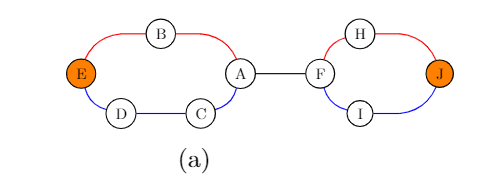

In [12]:
Image(filename=path.join("img","grafo_2.png"))

In [13]:
aa = Graph(edges={
    'E' : {'B' : 1},
    'B' : {'E' : 1, 'A' : 1},
    'A' : {'B' : 1, 'F' : 1},
    'F' : {'A' : 1, 'H' : 1},
    'H' : {'F' : 1, 'J' : 1},
    'J' : {'H' : 1}
})

bb = Graph(edges={
    'E' : {'D' : 1},
    'D' : {'E' : 1, 'C' : 1},
    'C' : {'D' : 1, 'A' : 1},
    'A' : {'C' : 1, 'F' : 1},
    'F' : {'I' : 1, 'A' : 1},
    'I' : {'J' : 1, 'F' : 1},
    'J' : {'I' : 1}
})

g_union, g_common, g_star = compose(aa, bb)

In [14]:
how_many_components(g_star)

2